# **Santander Customer Satisfaction**: Detecting Dissatisfied Customers
<br>
Link to presentation: 
<a href = "https://drive.google.com/file/d/16Dgd2rdfN2DKiP8aNBdFJ0hjdC-SikLA/view?usp=sharing">Click here to access the video presentation



##**INTRODUCTION**


As part of the Final Project for AI1 C4 Univ.ai's Course, the team-  Ratna Sambhav, Aashruti Agrawal, Joyson George, Binit Sengupta,  had delved into finding insights to a business problem whether a customer is satisfied or not.<br>**As we all know, customer is always right!**<br>



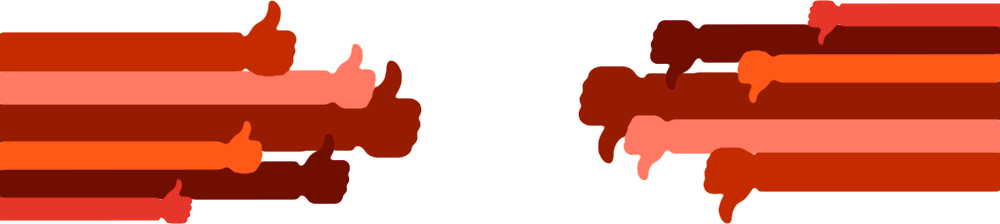




The inspiration in choosing this project is it's universal applicability across various domains and finding out if a customer is happy or not with the products or services offered can tackle many a great challenge in overcoming hurdles.
Customer satisfaction is a consumer’s understanding of how well an organization has delivered on their proposed and communicated value proposition. It is also one of the most important key performance indicators in every company today and is seen as a key element of a company’s success. Unhappy customers change their options in a second based on their expectations delivered from the company.
Santander is a Spanish multinational corporation bank and financial based company which operates in Europe, North and South America and Asia.<br>
This problem is a classification modelling task to determine whether a customer (datapoint) is dissatisfied or not.<br>
We are given two files :**a test.csv** and **train.csv** which contains around 370 features which are anonymized and 1 dependent feature that is TARGET. Each datapoint represents a customer and the value in TARGET will be **1** if a customer is dissatisfied with the company’s service and **0** if he is satisfied and also the dataset is heavily imbalanced.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Libraries and Data

###Importing relevant libraries

In [ ]:
#!pip install imblearn

#Importing necessary libraries
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import seaborn as sn
import matplotlib.pyplot as plt
from prettytable import PrettyTable

###Importing data to take a look at its features

In [ ]:
train = pd.read_csv('drive/MyDrive/Colab Notebooks/train.csv')
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


#Data Preparation
1. Checking for NA values
2. Understanding the variance in columns and eliminating single value columns
3. Removing features having sparse values
4. Identifying and eliminating duplicate columns
5. Removing features having very high correlation with other existing features
6. Balancing data by using a combination of over and under sampling.

In [ ]:
print("Shape of train dataframe is {}".format(train.shape))
print("The no. of datapoints in train data are %i and the no. of features in train data are %i"%(train.shape[0],train.shape[1]))

Shape of train dataframe is (76020, 371)
The no. of datapoints in train data are 76020 and the no. of features in train data are 371


##1. Checking for NA values.
There seems to be none.

In [ ]:
#Is any column containing NA values?
na = train.isna().sum()
na_val = [i for i in na if na[i] > 0]
if len(na_val) == 0:
    print('Non of the columns is containing any missing values.')

Non of the columns is containing any missing values.


##2. Understanding the variance in columns and eliminating single value columns
As can be visualized in the plot of number of features vs number of unique values in the features, there are a lot of columns having number of unique values less than 10 in them. Models containing only single unique values (constant features) has been eliminated.

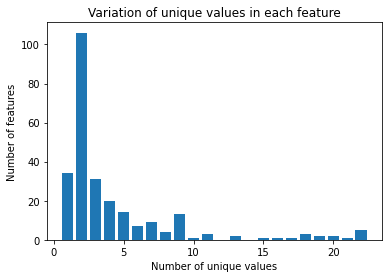

(76020, 337)


In [ ]:
#Removing feature columns with low variance
#Plotting number of unique values 
unique_numbers = train.nunique()
unique_dict = {}
for i in unique_numbers.index:
    dict_key = unique_numbers[i]
    if dict_key in unique_dict.keys():
        unique_dict[dict_key] += 1 
    else:
        unique_dict[dict_key] = 1

sorted_unique_dict = {i:unique_dict[i] for i in sorted(unique_dict)}
plt.bar(list(sorted_unique_dict.keys())[0:20], list(sorted_unique_dict.values())[0:20])
plt.ylabel('Number of features')
plt.xlabel('Number of unique values')
plt.title('Variation of unique values in each feature')
plt.show()

#Drop all those features which is containing a single value
newdf = train.copy()
for i in newdf.columns:
    if newdf[i].nunique() == 1:
        newdf.drop([i], axis=1, inplace=True)

print(newdf.shape)

As can be seen in the plot of possible number of unique values vs number of features having that number of unique values, it can be seen that there are around 35 features having a constant value column, more than 100 binary columns and as number of unique values increases, less and less number of features have that much number of unique values in them. <br>
Thus, 35 constant value features can be easily eliminated without doubt. For binary features, deeper study is needed to eliminae amongst them, those columns which are highly skewed or have very less variance.

##3. Removing features which are sparse

In [ ]:
i=0
for col in train.columns: #reomving all sparse features
    if np.percentile(train[col],99)==0:
        i+=1
        del train[col]
print("%i features were found to be sparse and these were all removed."%(i))

222 features were found to be sparse and these were all removed.


A very high number of columns are having sparse values in them. Since they contribute very less towards teaching the model, it is better to eliminate each of them.

## 4. Train-Test Split and eliminating duplicate columns.
There are in total 42 duplicate columns in the dataset. All of them were eliminated.

In [ ]:
#Removing duplicate columns

X = newdf.drop(['TARGET','ID'], axis=1)
y = newdf['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


#First choose 25000 rows of the dataset and take transpose of this
small_df_t = X_train.iloc[0:25000,:].T

#Following lines of identify the duplicate rows in 'small_df_t' which is 'transposed X_train'
unique_features = small_df_t.drop_duplicates(keep='first').T
duplicate_columns = [i for i in X_train.columns if i not in unique_features.columns]

#Duplicate columns dropped from the dataset
X_train.drop(duplicate_columns, axis=1, inplace=True)
X_test.drop(duplicate_columns, axis=1, inplace=True)

print('There are in total ',len(duplicate_columns),' duplicate columns in the dataset \n')
# print(pd.DataFrame(duplicate_columns, columns = ['Features']))

pt1 = PrettyTable(['Index','Duplicated Features'])
for i in range(len(duplicate_columns)):
  pt1.add_row([i, duplicate_columns[i]])
print(pt1)


There are in total  42  duplicate columns in the dataset 

+-------+-------------------------------+
| Index |      Duplicated Features      |
+-------+-------------------------------+
|   0   |        ind_var13_medio        |
|   1   |           ind_var18           |
|   2   |           ind_var26           |
|   3   |           ind_var25           |
|   4   |          ind_var29_0          |
|   5   |           ind_var29           |
|   6   |           ind_var32           |
|   7   |           ind_var34           |
|   8   |           ind_var37           |
|   9   |           ind_var39           |
|   10  |        num_var13_medio        |
|   11  |           num_var18           |
|   12  |           num_var26           |
|   13  |           num_var25           |
|   14  |          num_var29_0          |
|   15  |           num_var29           |
|   16  |           num_var32           |
|   17  |           num_var34           |
|   18  |           num_var37           |
|   19  |        

## 5. Removing features having very high correlation with other existing features
In total **133 columns** have been observed to be having more than **90%** correlation with any other column. Names of those columns have been listed down. Those columns were eliminated.

In [ ]:
#Removing correlated values
corr_matrix = pd.DataFrame(X_train.corr())
correlated_feut = set()

for i in range(len(X_train.columns)):
  for j in range(i):
    if (abs(corr_matrix.iloc[i,j]) > 0.9):
      correlated_feut.add(X_train.columns[i])

X_train.drop(correlated_feut, axis=1, inplace=True)
X_test.drop(correlated_feut, axis=1, inplace=True)

correlated_feut = list(correlated_feut)
pt2 = PrettyTable(['Index','One of correlated columns'])
for i in range(len(correlated_feut)):
  pt2. add_row([i, correlated_feut[i]])

print('Number of correlated columns having a correlation of more than 90% with any other column is ', len(correlated_feut),':')
print(pt2)

Number of correlated columns having a correlation of more than 90% with any other column is  133 :
+-------+-------------------------------+
| Index |   One of correlated columns   |
+-------+-------------------------------+
|   0   |          saldo_var31          |
|   1   |           ind_var24           |
|   2   |     saldo_medio_var8_ult3     |
|   3   |       num_op_var39_ult3       |
|   4   |  saldo_medio_var13_corto_ult3 |
|   5   |        num_var13_largo        |
|   6   |       ind_var9_cte_ult1       |
|   7   |            num_var1           |
|   8   |           ind_var44           |
|   9   |   delta_imp_amort_var18_1y3   |
|   10  |           num_var5_0          |
|   11  |          num_var34_0          |
|   12  |           num_var14           |
|   13  |   num_meses_var13_corto_ult3  |
|   14  |     saldo_medio_var17_ult1    |
|   15  |           num_var6_0          |
|   16  |          num_var24_0          |
|   17  |       num_var13_corto_0       |
|   18  |      num_

## 6. Using a combination of oversampling and undersampling for handling imbalance in the response
1. Data imbalance before sampling.
2. Sampling Procedure: 


> *   Response variable is imbalanced: number of zero class is **29 times** of the number of ones class.
*   **SMOTE** has been used to oversample the minority class such that the ratio of minority class to majority class becomes 0.3 after sampling.
*   **Random undersampler** was then implemented to remove the remaining imbalance. 
*   For visualization of the imbalance, two of the most varying features have been selected making the x & y axis of the plot.

3. Data imbalance after sampling.



###Data imbalance before sampling.

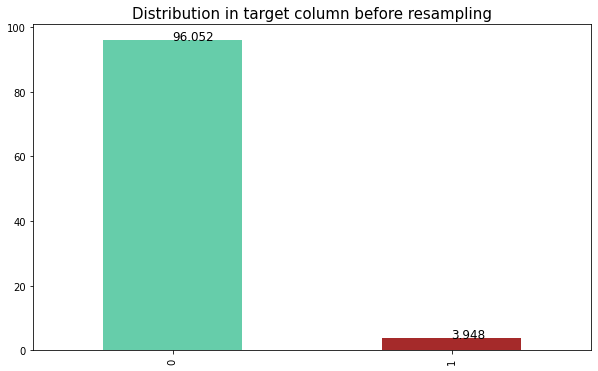

In [ ]:
# Count plot for target column.

tg = round(y_train.value_counts(normalize = True)*100,4)
tg.plot.bar(figsize=(10,6), color = ['mediumaquamarine','brown']) #plotting a bar plot
plt.title("Distribution in target column before resampling", fontsize=15) # title of plot
for x,y in zip([0,1],tg): # to annotate the values on top of the bars
    plt.text(x,y,y,fontsize=12)
plt.show()

###Sampling Procedure:

Data imbalance before sampling: 
Number of zeros:  58415 
Number of ones:  58415
Shape of x_train before sampling (60816, 160) 



Data imbalance after oversampling (SMOTE): 
Number of zeros:  58415 
Number of ones:  58415
Shape of x_train before sampling (70098, 160) 



Data imbalance after final undersampling (random undersampler): 
Number of zeros:  11683 
Number of ones:  11683
Shape of x_train before sampling (23366, 160) 





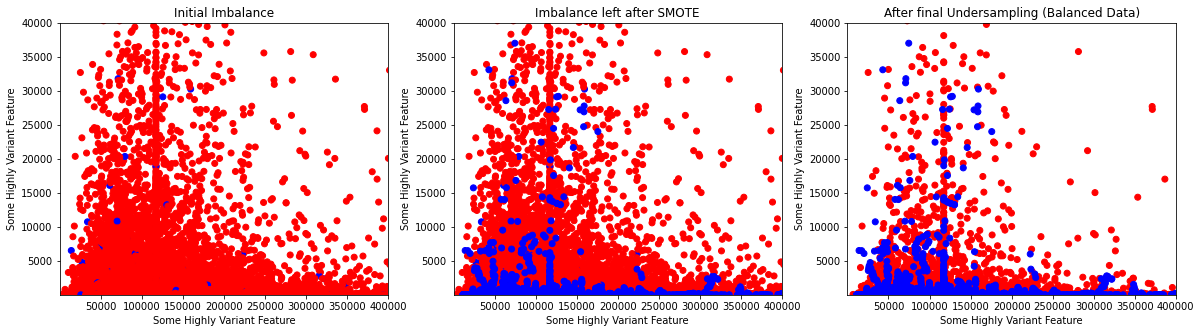

In [ ]:
#Get those features which have max number of unique values

#Get the two features from the feature having max number of unique values
most_varying_feature1 = unique_numbers.sort_values(ascending=False).index[1]
most_varying_feature2 = unique_numbers.sort_values(ascending=False).index[2]

#Checking for data imbalace
print('Data imbalance before sampling: ')
print('Number of zeros: ', y_train.value_counts()[0],'\nNumber of ones: ', y_train.value_counts()[0])
print('Shape of x_train before sampling', X_train.shape,'\n\n\n')

#Oversampling the minoiry class
sm = SMOTE(sampling_strategy=0.2, random_state=42)
X_over, y_over = sm.fit_resample(X_train, y_train)

print('Data imbalance after oversampling (SMOTE): ')
print('Number of zeros: ', y_over.value_counts()[0],'\nNumber of ones: ', y_over.value_counts()[0])
print('Shape of x_train before sampling', X_over.shape,'\n\n\n')

#Undersampling
# undersample = NearMiss(version=3, n_neighbors_ver3=3)
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_over,y_over)

print('Data imbalance after final undersampling (random undersampler): ')
print('Number of zeros: ', y_under.value_counts()[0],'\nNumber of ones: ', y_under.value_counts()[0])
print('Shape of x_train before sampling', X_under.shape,'\n\n\n')


#Plotting Initial Data Distribution
fig = plt.figure(figsize=(20,5))
ax0 = fig.add_subplot(1,3,1)
colors = {0:'red',1:'blue'}
ax0.scatter(X_train[most_varying_feature1], X_train[most_varying_feature2], c=y_train.map(colors))
ax0.set_xlim(1,400000)
ax0.set_ylim(1,40000)
ax0.set_xlabel('Some Highly Variant Feature')
ax0.set_ylabel('Some Highly Variant Feature')
ax0.set_title('Initial Imbalance')

ax1 = fig.add_subplot(1,3,2)
ax1.scatter(X_over[most_varying_feature1], X_over[most_varying_feature2], c=y_over.map(colors))
ax1.set_xlim(1,400000)
ax1.set_ylim(1,40000)
ax1.set_xlabel('Some Highly Variant Feature')
ax1.set_ylabel('Some Highly Variant Feature')
ax1.set_title('Imbalance left after SMOTE')

ax2 = fig.add_subplot(1,3,3)
ax2.scatter(X_under[most_varying_feature1], X_under[most_varying_feature2], c=y_under.map(colors))
ax2.set_xlim(1,400000)
ax2.set_ylim(1,40000)
ax2.set_xlabel('Some Highly Variant Feature')
ax2.set_ylabel('Some Highly Variant Feature')
ax2.set_title('After final Undersampling (Balanced Data)')
plt.show()

###Data imbalance after sampling.

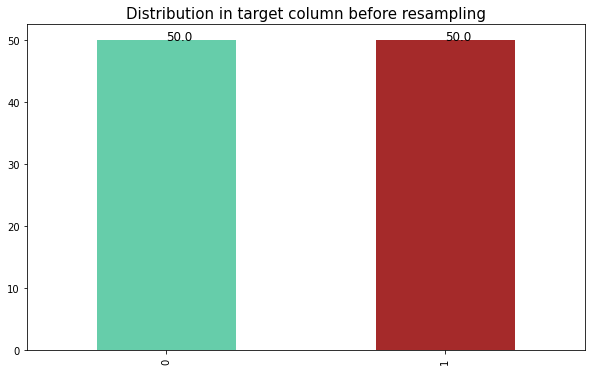

In [ ]:
# print(y_under.value_counts())
# plt.figure(figsize = (8,5))
# sn.countplot(x = y_under)
# plt.xlabel('Target', size = 12)
# plt.ylabel('Count', size = 12)
# plt.title('Distribution in target column before resmpling', size = 12)
# plt.show()

# Count plot for target column.

tg = round(y_under.value_counts(normalize = True)*100,4)
tg.plot.bar(figsize=(10,6), color = ['mediumaquamarine','brown']) #plotting a bar plot
plt.title("Distribution in target column before resampling", fontsize=15) # title of plot
for x,y in zip([0,1],tg): # to annotate the values on top of the bars
    plt.text(x,y,y,fontsize=12)
plt.show()

# Logistic Regression:
1. Selecting the optimal value of C using cross-validation.
2. Feature selection based on t-values and p-values of individual features.
3. Training the logistic regression model on the train set and predicting on test set to get roc_auc and accuracy score.

##1. Selecting the optimal value of C using cross-validation.
Optimal value of parameter C is found to be 0.01.

In [ ]:
X_train = X_under.copy()
y_train = y_under.copy()

c_list = [0.0001*(10**i) for i in range(7)]
score_for_c = []
coef_list = []

for c in c_list:
  logireg = LogisticRegression(C = c, max_iter= 1000, class_weight = 'balanced')
  score = cross_val_score(logireg, X_train, y_train, scoring='roc_auc', cv=10)
  score_for_c.append(np.mean(np.array(score)))

c_opt = c_list[score_for_c.index(max(score_for_c))]

print('The value of C for which cross validation training score is maximum is ', c_opt)


The value of C for which cross validation training score is maximum is  0.1


##2. Feature selection based on t-values and p-values of individual features.

###Collecting coefficient matrix (coefficient of all the predictors for multiple bootstraps of the dataset)
Fitting on a logistic regression model was done for 100 bootstraped samples of the dataset and for all those samples coefficients were stored in the coefficient matrix.

In [ ]:
numboots=100
coef_list = []

for i in range(numboots):
  X_sampled = X_train.sample(frac=1, replace=True)
  y_sampled = y_train[X_sampled.index]

  logreg = LogisticRegression(C = c_opt, max_iter= 1000)
  logreg.fit(X_sampled, y_sampled)
  coef_list.append(logreg.coef_[0])


###Calculation of T and p values
T-values were calculated from the coefficient matrix using mean and variance of the coefficients. p-values were obtained using a library function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


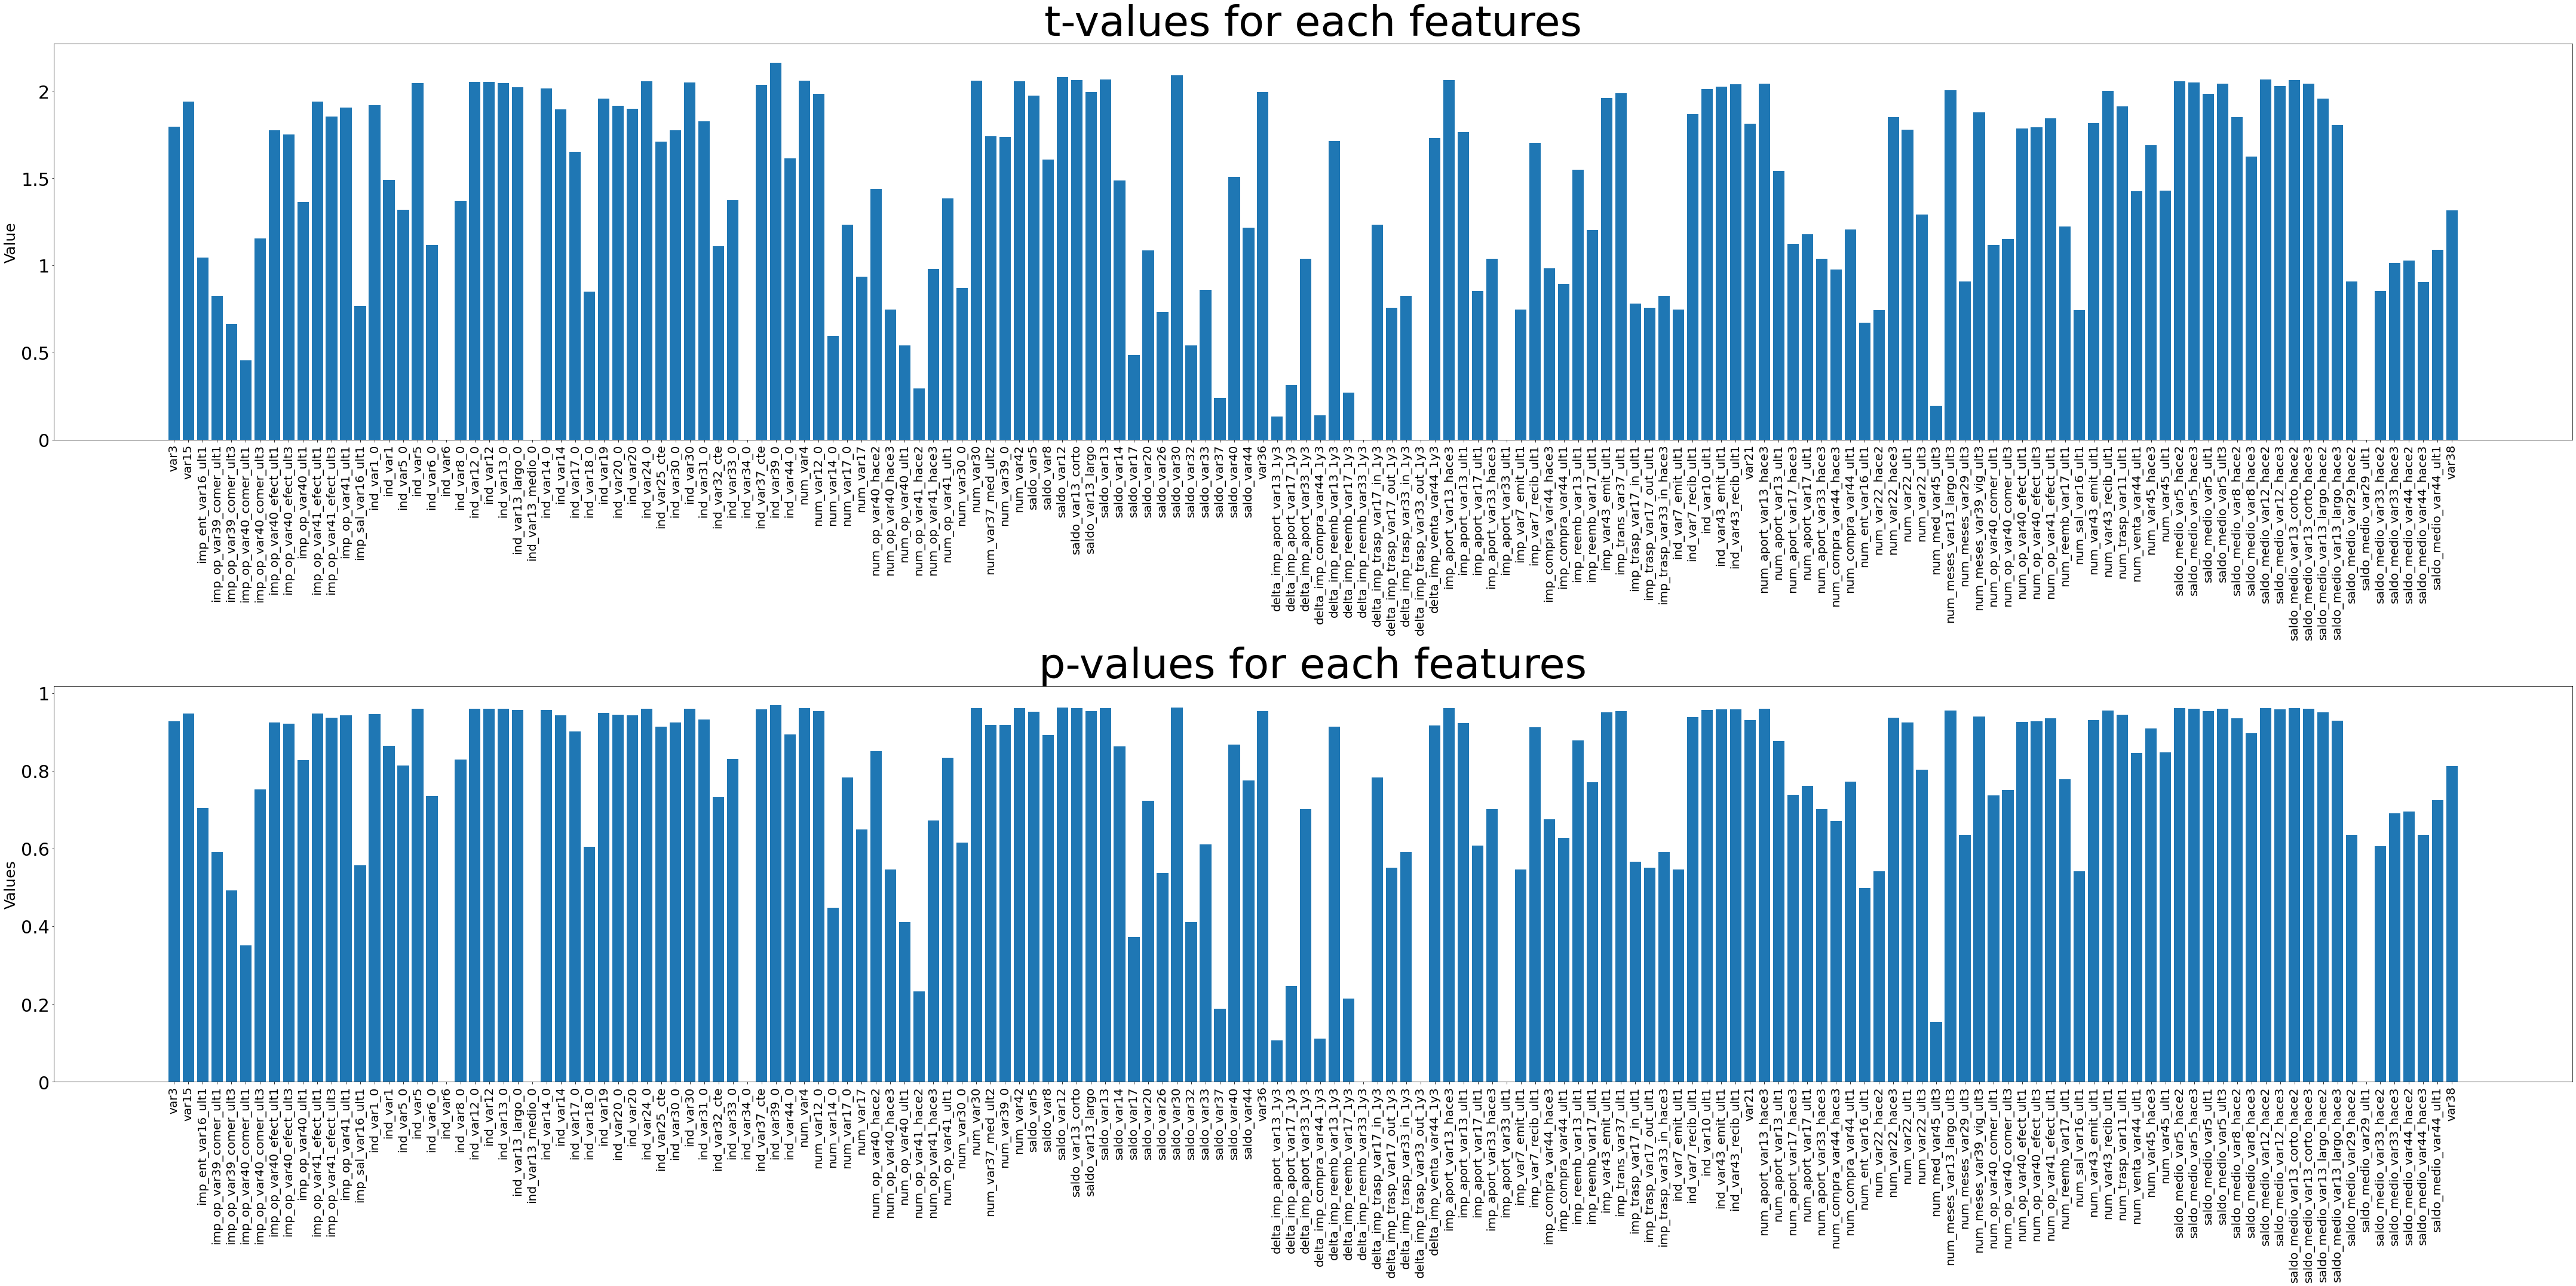

In [ ]:
#Calculation of t-test values
mean_coefs_list = [abs(np.mean(np.array(coef_list)[:,i])) for i in range(np.array(coef_list).shape[1])]
mean_coefs_dict = {i:j for i,j in zip(X_train.columns, mean_coefs_list)}

tt_values = [abs(np.mean(np.array(coef_list)[:,i])/np.std(np.array(coef_list)[:,i])) for i in range(np.array(coef_list).shape[1])]
tt_values_dict = {i:j for i,j in zip(X_train.columns, tt_values)}

n = X_sampled.shape[0]
m = len(tt_values_dict.keys())
pval = stats.t.sf(tt_values, n-1)*2
conf = list(np.ones(m))-pval
conf_dict = {i:j for i,j in zip(X_train.columns, conf)}

fig = plt.figure(figsize=(60,30))
ax0 = fig.add_subplot(2,1,1)
ax0.bar(tt_values_dict.keys(), tt_values_dict.values())
ax0.set_yticklabels((0,0.5,1,1.5,2),fontsize=30)
ax0.set_xticklabels(tt_values_dict.keys(), fontsize=20, rotation='vertical')
ax0.set_ylabel('Value', fontsize=25)
ax0.set_title('t-values for each features',fontsize=70)

ax1 = fig.add_subplot(2,1,2)
ax1.bar(tt_values_dict.keys(), conf)
ax1.set_yticklabels((0,0.2,0.4,0.6,0.8,1), fontsize=30)
ax1.set_xticklabels(tt_values_dict.keys(), fontsize=20, rotation='vertical')
ax1.set_ylabel('Values', fontsize=25)
ax1.set_title('p-values for each features',fontsize=70)
plt.tight_layout()
plt.show()

###Feature elimination based on T and p values
Elimination was done for the value of (1-p) less than 0.8 and values of t-value less than 1.5.

In [ ]:
#Now we know the p-value and t-value of the predictors
#So we eliminate features based on these values
#First eliminating those values which are having p-values less than 0.8
predictor_selection_p = [i for (i,j) in conf_dict.items() if j<0.8]
new_t_dict = [tt_values_dict.pop(columns) for columns in predictor_selection_p]
t_dict_final = [i for (i,j) in tt_values_dict.items() if j>1.5]

X_train_lreg = X_train[t_dict_final]
X_test_lreg = X_test[t_dict_final]

print('Shape of train set after sampling: ',X_train_lreg.shape)
print('Shape of test set after sampling: ', X_test_lreg.shape)

Shape of train set after sampling:  (23366, 80)
Shape of test set after sampling:  (15204, 80)


##3. Training the logistic regression model and calculating scores

###Training X_train and y_train on Logistic Regression model
Before fitting the data in logistic regression model, MinMaxScaler was applied to the dataset to forbid it from training with very high values.

In [ ]:
#Using min max scaler before fitting the data into logistic regression
mms = MinMaxScaler()
X_train_lreg_mms = mms.fit_transform(X_train_lreg)
X_train_lreg = pd.DataFrame(data = X_train_lreg_mms, columns = X_train_lreg.columns)
X_test_lreg_mms = mms.fit_transform(X_test_lreg)
X_test_lreg = pd.DataFrame(data = X_test_lreg_mms, columns = X_test_lreg.columns)

print(X_train.shape, X_test.shape)
print(X_train_lreg.shape, X_test_lreg.shape)

(23366, 160) (15204, 160)
(23366, 80) (15204, 80)


In [ ]:
logreg = LogisticRegression(C = c_opt, max_iter= 1000, random_state=42, class_weight = 'balanced')
logreg.fit(X_train_lreg, y_train)
lreg_pred = logreg.predict(X_test_lreg)

###Calculation of scores:

In [ ]:
#created a dataframe and saved the computed metric onto the dataframe
lreg_df = pd.DataFrame(data=[f1_score(y_test, lreg_pred),accuracy_score(y_test, lreg_pred), recall_score(y_test, lreg_pred),
                   precision_score(y_test, lreg_pred), roc_auc_score(y_test, lreg_pred)], 
             columns=['Logistic Regression'],
             index=['F1 score',"Accuracy", "Recall", "Precision", "ROC AUC Score"])

#concatenating the model and saving the feature in the dataframe
lreg_models = round(pd.concat([lreg_df], axis=1),3)
lreg_models

,Logistic Regression
F1 score,0.150
Accuracy,0.716
Recall,0.626
Precision,0.085
ROC AUC Score,0.673


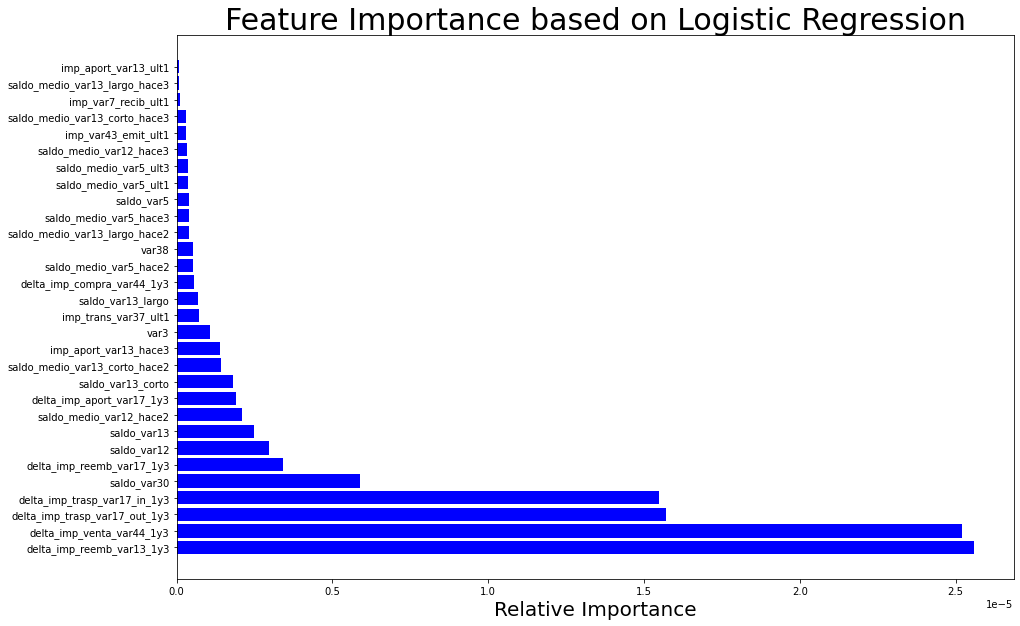

In [ ]:
#Logistic Regression Important Features
features_logreg_sorted = pd.DataFrame(sorted(mean_coefs_dict.items(), key=lambda x:x[1], reverse=True))
#print(features_logreg_sorted)

plt.figure(figsize=(15,10))
plt.title('Feature Importance based on Logistic Regression', fontsize=30)
plt.barh(features_logreg_sorted.iloc[0:30,0], features_logreg_sorted.iloc[:30,1], color='blue', align='center')
#plt.yticks(features_xgb_sorted.iloc[:30,0], [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=20)
plt.show()

# Decision Tree Classifier
We have followed the following approach for implementing decision tree

  * First we have  splitted the dataset into train and test dataset
  * Initiated a DecisionTreeClassifer instance with random state 20 to get similar result everytime.
  * Fitted my train and test dataset on the decision tree model object.
  * Predicted the result on X_test
  * Computed different metric (accuracy, f1 score, ROC AUC score, recall, precision) to calculate the error.
  * Hypertuned some paramters using GridSearchCV and repredicted the X_test on the optimized model and computed the error using different metrics.

In [ ]:
#splitting the dataset
X_train, y_train = X_under.copy(), y_under.copy()

In [ ]:
#implementing decision tree
dt = DecisionTreeClassifier(random_state=20, class_weight='balanced')
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=20)

In [ ]:
#predicted on X_test
dtpred = dt.predict(X_test)
dtpred_prob = dt.predict_proba(X_test)[:,1]

#created a confusion matrix of actual vs prediction and stored it in a variable
cm_dtree = confusion_matrix(y_test, dtpred)

#created a dataframe and saved the computed metric onto the dataframe
dtree_df = pd.DataFrame(data=[f1_score(y_test, dtpred),accuracy_score(y_test, dtpred), recall_score(y_test, dtpred),
                   precision_score(y_test, dtpred), roc_auc_score(y_test, dtpred_prob)], 
             columns=['Decision Tree'],
             index=['F1 score',"Accuracy", "Recall", "Precision", "ROC AUC Score"])

#concatenating the model and saving the feature in the dataframe
df_models = round(pd.concat([dtree_df], axis=1),3)
df_models


,Decision Tree
F1 score,0.167
Accuracy,0.819
Recall,0.455
Precision,0.102
ROC AUC Score,0.645


In [ ]:
# Setup the parameters and distributions to sample from: param_dist
params = {'max_depth': [2,10,15,20,40,50],
          'min_samples_leaf':[1,5,10],
          'min_samples_split':[2,5,10],
           'random_state' :[20]
             }             

 # Instantiate the GridSearchCV object: tree_cv
grid_dt = GridSearchCV(dt, param_grid= params, cv = 5, scoring = 'accuracy')

# Fit it to the data
grid_dt.fit(X_train, y_train)

#printing the tuned hyperparameters
print("Tuned Decision Tree Parameters: {}".format(grid_dt.best_params_))

Tuned Decision Tree Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 20}


In [ ]:
#predicting hte X_test with the tuned decision tree model
dtpred_grid = grid_dt.predict(X_test)

#creating and saving a confusion matrix
cm_dtree = confusion_matrix(y_test, dtpred_grid)

#creating a dataframe to save the evaluation metric of the hypertuned model
dtree_df_grid = pd.DataFrame(data=[f1_score(y_test, dtpred_grid),accuracy_score(y_test, dtpred_grid), recall_score(y_test, dtpred_grid),
                   precision_score(y_test, dtpred_grid), roc_auc_score(y_test, dtpred_grid)], 
              columns=['Optimized DT'],
              index=['F1 score',"Accuracy", "Recall", "Precision", "ROC AUC Score"])

#concating the dataframe to add the data of hypertuned model
df_models = round(pd.concat([dtree_df,dtree_df_grid], axis=1),3)
df_models


,Decision Tree,Optimized DT
F1 score,0.167,0.205
Accuracy,0.819,0.822
Recall,0.455,0.573
Precision,0.102,0.125
ROC AUC Score,0.645,0.703


**Inference-**

The accuracy of the model seems good, but as we can see f1 score and ROC AUC score is very very less compareively which suggest that most of the labels were incorrectly predicted. This could be attributed to the high imbalance in dataset, even though we applied resampling techniques but the results somewhat indicates towards the skewness of the dataset.

Real possible cause of skewness in the data even after applying rresampling technique could be furthur explored and could be worked upon.

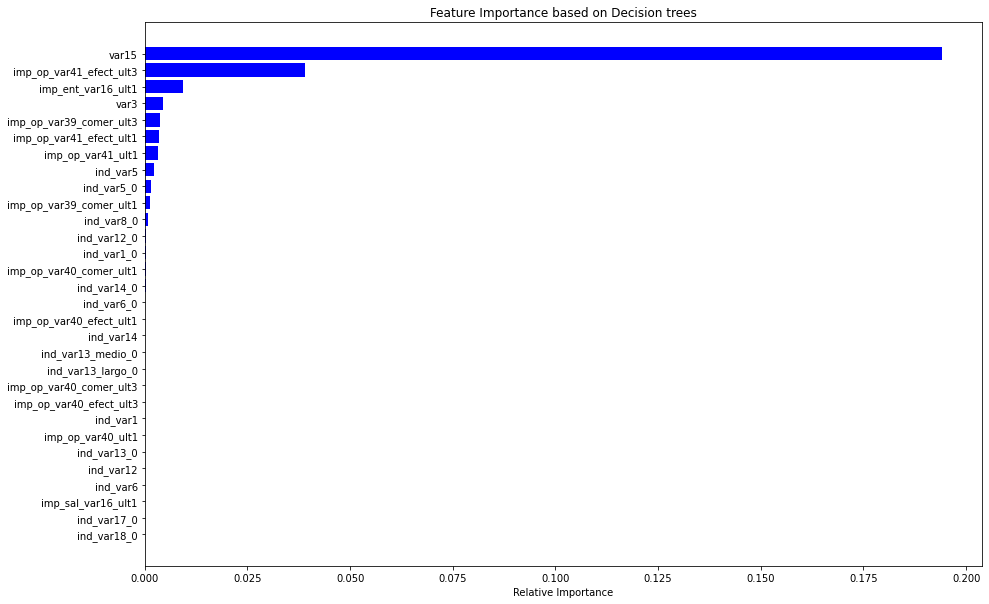

In [ ]:
#plotting featurer importance based on decision tree
features = X_train.columns

#extracting 
importance = grid_dt.best_estimator_.feature_importances_
#sorting the important feature 
indices = np.argsort(importance[:30])

plt.figure(figsize=(15,10))
plt.title('Feature Importance based on Decision trees')
plt.barh(range(len(indices)), importance[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Random Forest Classifier
  * Splitted the dataset into train and test sets
  * Initiated a RandomForestClassifer instance with random state 42 to get similar result everytime.
  * Fitted my train and test dataset on the Random Forest classifier with default values
  * Predicted the result on X_test
  * Computed different metrics (accuracy, f1 score, ROC AUC score) on the test data.
  * Used the fitted model to calculate permutation importances of the features
  * Used the 50 most important features to create another Random forest model with default parameters.
  *  Did hyperparameter tuning using GridSearchCV two times to find the best values.
  * Computed the error using different metrics for each of the models and compared them.

## Splitting the dataset into train test sets

In [ ]:
#splitting the dataset into train and test sets
xtrain, ytrain, xtest, ytest = X_under.copy(), y_under.copy(), X_test.copy(), y_test.copy()

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((23366, 160), (15204, 160), (23366,), (15204,))

## Model for feature selection using permutation importances

In [ ]:
from sklearn.inspection import permutation_importance
#Model for getting the 50 most important features
forest = RandomForestClassifier(random_state=42,n_estimators=400,class_weight='balanced')
forest.fit(xtrain, ytrain)
yproba = forest.predict_proba(xtest)
ytest_pred = forest.predict(xtest)

In [ ]:
#metrics
auc = np.round(roc_auc_score(ytest, yproba[:,1]),4)
acc = accuracy_score(ytest,ytest_pred)
f1 = f1_score(y_test,ytest_pred)
print("ROC AUC score :",round(auc,4))
print("F1 score :",round(f1,4))
print("Accuracy :",round(acc,4))

#parameters of the model
#{'max_features': 'auto','min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': None, 'random_state': 42,}

ROC AUC score : 0.7958
F1 score : 0.2158
Accuracy : 0.8838


## Feature Selection using Permutation importance

In [ ]:

#calculating permutation importance for feature selection 
forest_result = permutation_importance(forest,xtrain,ytrain,random_state=0)


#sorting feature importance descending and selecting best 50 features

forest_importance_sorted_idx = np.argsort(forest_result.importances_mean)[::-1]
xtrain_new = xtrain.iloc[:][(xtrain.columns[forest_importance_sorted_idx[:50]])]
xtest_new = xtest.iloc[:][(xtrain.columns[forest_importance_sorted_idx[:50]])]



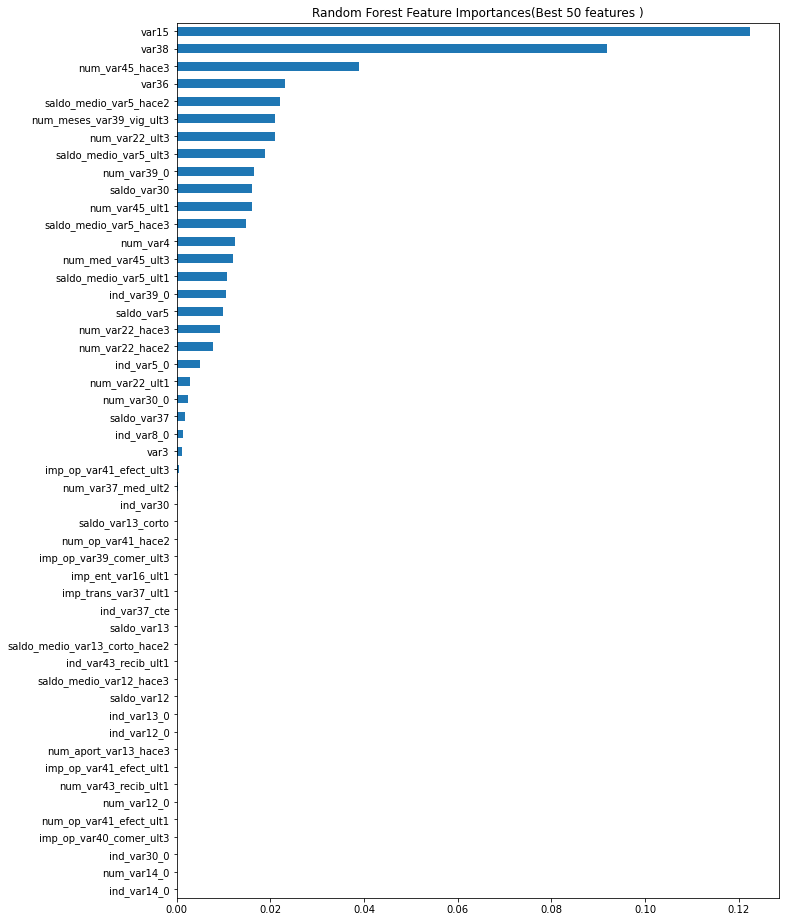

In [ ]:
#plotting feature importances of best 50 features
tree_importance_sorted_idx = np.argsort(forest_result.importances_mean)[::-1][:50]
imp = sorted(forest_result.importances_mean,reverse=True)[:50]
tree_indices = np.arange(0, len(imp)) +0.5

per_importances = pd.Series(imp,index=xtrain.columns[tree_importance_sorted_idx]).sort_values(ascending=True)
ax = per_importances.plot.barh()
ax.set_title("Random Forest Feature Importances(Best 50 features )")
ax.figure.tight_layout()
ax.figure.set_figheight(15)
ax.figure.set_figwidth(15)



## Fitting RandomForestClassifier model (with default values) on the best 50 features 

In [ ]:
#Fitting model with default parameters
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain_new,ytrain)
y_pred = rf.predict(xtest_new)
y_proba = rf.predict_proba(xtest_new)


In [ ]:
#calculating metrics
f1_1 =  f1_score(ytest,y_pred)
acc_1 = accuracy_score(ytest,y_pred)
p_1 = precision_score(ytest,y_pred)
r_1 = recall_score(ytest,y_pred)

#calculating roc_auc_score
y_proba = rf.predict_proba(xtest_new)[:, 1]
auc_1 = roc_auc_score(ytest, y_proba)

rforest_df1 = pd.DataFrame(data=[f1_1,acc_1, r_1,
                   p_1, auc_1], 
             columns=['Random Forest'],
             index=['F1 score',"Accuracy", "Recall", "Precision", "ROC AUC Score"])


rforest_df1



,Random Forest
F1 score,0.218523
Accuracy,0.879571
Recall,0.421746
Precision,0.147465
ROC AUC Score,0.793935


In [ ]:
#default parameters of the RandomForestClassifier Model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Implementing first round of GridSearchCV

In [ ]:
#implementing GridSearchCV
#{'max_features': 'auto','min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': None, 'random_state': 42,}
param_grid = {
    'min_samples_leaf': [ 1,2,3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100,200,300,400]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring = {'AUC': 'roc_auc'},refit='AUC',n_jobs=None,)
grid_search.fit(xtrain_new,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 400]},
             refit='AUC', scoring={'AUC': 'roc_auc'})

In [ ]:
print(grid_search.best_params_)
#best hyperparameters
#{'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 400}

{'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 400}


In [ ]:
#metrics for the best estimator after GridSearchCV 1
best_grid_rf = grid_search.best_estimator_
print(best_grid_rf)
y_pred = best_grid_rf.predict(xtest_new)

f1_2 =  f1_score(ytest,y_pred)
acc_2 = accuracy_score(ytest,y_pred)
p_2 = precision_score(ytest,y_pred)
r_2 = recall_score(ytest,y_pred)

#calculating roc_auc_score
y_proba = best_grid_rf.predict_proba(xtest_new)[:, 1]
auc_2 = roc_auc_score(ytest, y_proba)

rforest_df2 = pd.DataFrame(data=[f1_2,acc_2, r_2,
                   p_2, auc_2], 
             columns=['Random Forest Score(After GridSearchCV 1)'],
             index=['F1 score',"Accuracy", "Recall", "Precision", "ROC AUC Score"])


rforest_df2


RandomForestClassifier(min_samples_split=4, n_estimators=400, random_state=42)


,Random Forest Score(After GridSearchCV 1)
F1 score,0.228656
Accuracy,0.896606
Recall,0.381967
Precision,0.163165
ROC AUC Score,0.799456


There is an increase of 1.009% in the AUC score after first round of GridSearchCV

## Implementing second round of GridSearchCV

In [ ]:
#implementing GridSearchCV again
#{'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 400}
param_grid = {
    'min_samples_leaf': [ 1,2,3],
    'min_samples_split': [3, 4,5],
    'n_estimators': [350,400,450,500]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring = {'AUC': 'roc_auc'},refit='AUC')
grid_search.fit(xtrain_new,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [350, 400, 450, 500]},
             refit='AUC', scoring={'AUC': 'roc_auc'})

In [ ]:
print(grid_search.best_params_)

{'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [ ]:
best_grid_rf2 = grid_search.best_estimator_
print(best_grid_rf2)
y_pred = best_grid_rf2.predict(xtest_new)
f1_3 =  f1_score(ytest,y_pred)
acc_3 = accuracy_score(ytest,y_pred)
p_3 = precision_score(ytest,y_pred)
r_3 = recall_score(ytest,y_pred)

#calculating roc_auc_score
y_proba = best_grid_rf2.predict_proba(xtest_new)[:, 1]
auc_3 = roc_auc_score(ytest, y_proba)

rforest_df3 = pd.DataFrame(data=[f1_3,acc_3, r_3,
                   p_3, auc_3], 
             columns=['Random Forest Score (after GridSearchCV 2)'],
             index=['F1 score',"Accuracy", "Recall", "Precision", "ROC AUC Score"])


rforest_df3


RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=42)


,Random Forest Score (after GridSearchCV 2)
F1 score,0.229126
Accuracy,0.895554
Recall,0.386885
Precision,0.162759
ROC AUC Score,0.802338


## Plotting and Tabulating the results

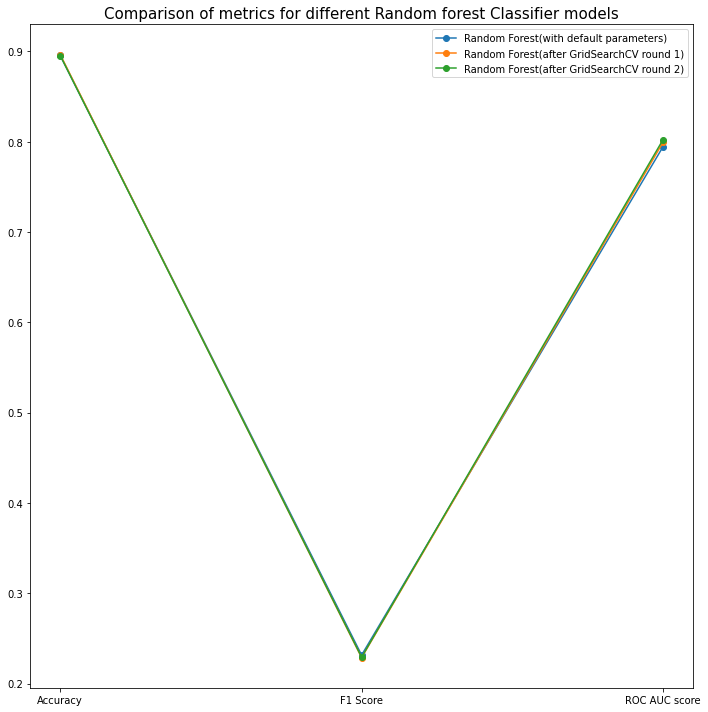


+--------------------------------------------+----------+---------------+----------+
|                   Model                    | F1 Score | ROC AUC score | Accuracy |
+--------------------------------------------+----------+---------------+----------+
|   Random Forest(with default parameters)   |  0.2315  |    0.79453    |  0.8956  |
| Random Forest (after GridSearchCV round 1) |  0.2287  |    0.79946    |  0.8966  |
| Random Forest (after GridSearchCV round 2) |  0.2291  |    0.80234    |  0.8956  |
+--------------------------------------------+----------+---------------+----------+


In [ ]:
#results
#plot of metrics
plt.figure(figsize=(10,10)),
plt.title("Comparison of metrics for different Random forest Classifier models",fontsize=15)
plt.plot([acc_1,f1_1,auc_1],label='Random Forest(with default parameters)',marker='o')
plt.plot([acc_2,f1_2,auc_2],label='Random Forest(after GridSearchCV round 1)',marker='o')
plt.plot([acc_3,f1_3,auc_3],label='Random Forest(after GridSearchCV round 2)',marker='o')
plt.xticks([0,1,2],['Accuracy',"F1 Score","ROC AUC score"])
plt.legend()
plt.tight_layout()
plt.show()
print()
#metrics in tabular form
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ["Model","F1 Score","ROC AUC score","Accuracy"]
pt.add_row(["Random Forest(with default parameters)",round(f1_1,4),round(auc_1,5),round(acc_1,4)])
pt.add_row(["Random Forest (after GridSearchCV round 1)",round(f1_2,4),round(auc_2,5),round(acc_2,4)])
pt.add_row(["Random Forest (after GridSearchCV round 2)",round(f1_3,4),round(auc_3,5),round(acc_3,4)])
print(pt)


## Results of hyperparameter tuning
* After the first round of hyperparameter tuning, there is an increase in ROC AUC score by  0.62% and an increase in Accuracy by 0.112%.
* After the second round, there is an increase in ROC AUC score by 0.3602% and Accuracy is the same as the first model.



## Feature importance of the best model (best 30 features by permutation importance)


In [ ]:

#calculating permutation importance for feature selection 
forest_result = permutation_importance(best_grid_rf2,xtrain_new,ytrain,random_state=0)


#sorting feature importance descending and selecting best 50 features

forest_importance_sorted_idx = np.argsort(forest_result.importances_mean)[::-1]


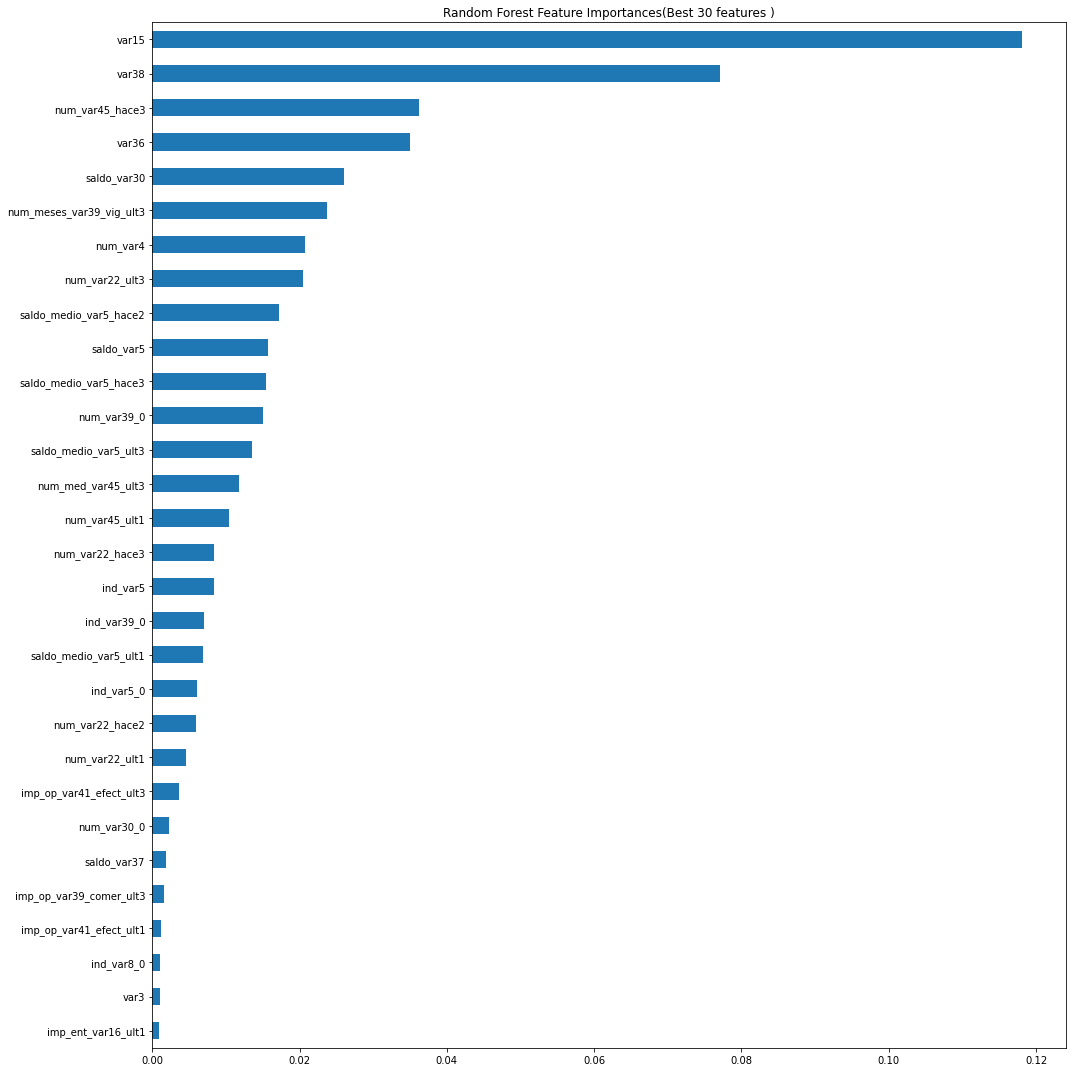

In [ ]:
#plotting feature importances of best 30 features
forest_importance_sorted_idx = np.argsort(forest_result.importances_mean)[::-1][:50]
imp = sorted(forest_result.importances_mean,reverse=True)[:50]

per_importances = pd.Series(imp[:30],index=xtrain_new.columns[forest_importance_sorted_idx[:30]]).sort_values(ascending=True)
ax = per_importances.plot.barh()
ax.set_title("Random Forest Feature Importances(Best 30 features )")
ax.figure.set_figheight(15)
ax.figure.set_figwidth(15)
ax.figure.tight_layout()


In [ ]:
#Comparison of metrics of all Random forest models
metrics_df = round(pd.concat([rforest_df1,rforest_df2,rforest_df3], axis=1),3)
metrics_df

,Random Forest Score(without optimization),Random Forest Score(After GridSearchCV 1),Random Forest Score (after GridSearchCV 2)
F1 score,0.231,0.229,0.229
Accuracy,0.896,0.897,0.896
Recall,0.392,0.382,0.387
Precision,0.164,0.163,0.163
ROC AUC Score,0.795,0.799,0.802


#Adaboost Classifier
*   Decision Tree Based Adaboost Classifier
> 1. Hyperparameter Tuning
> 2. Fitting training set on the model with optimized parameters and predicting on the test dataset
> 3. Future Importances

*   Logistic Regression Based Adaboost Classifier
> 1. Fitting training set on the model with optimized parameters and predicting on the test dataset
> 2. Future Importances









##Decision Tree Based Adaboost Classifier

### 1. Hyperparameter Tuning
Using GridSearchCV for optimizing paramters 'learning_rate' and 'number of estimators' of the Adaboost classifier.

In [ ]:
X_train = X_under.copy()
y_train = y_under.copy()

ab_clf = AdaBoostClassifier(random_state=42)

parameters = {
    'n_estimators': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    'learning_rate': [(1.0 + x / 100) for x in range(0, 8)]
}
clf = GridSearchCV(ab_clf, parameters, scoring='precision', cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [1.0, 1.01, 1.02, 1.03, 1.04, 1.05,
                                           1.06, 1.07],
                         'n_estimators': [12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28]},
             scoring='precision')

In [ ]:
best_parameters = clf.best_params_
print(best_parameters)

parameters = clf.cv_results_['params']

learning_rate_list = [i['learning_rate'] for i in parameters]
n_estimators_list = [i['n_estimators'] for i in parameters]
scores = clf.cv_results_['mean_test_score']

{'learning_rate': 1.07, 'n_estimators': 28}


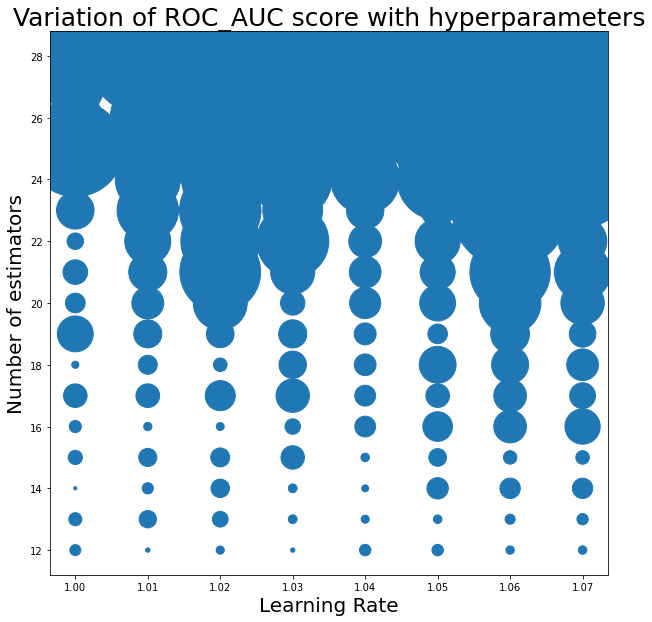

In [ ]:
#x,y = np.meshgrid(learning_rate_list, n_estimators_list)
x = learning_rate_list
y = n_estimators_list
z = [np.exp(200*i) for i in scores]
z /= min(z)

plt.figure(figsize=(10,10))
plt.scatter(x, y, s=10*z);
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Number of estimators', fontsize=20)
plt.title('Variation of ROC_AUC score with hyperparameters', fontsize=25)
plt.show()


###2. Fitting training set on the model with optimized parameters and predicting on the test dataset
Getting accuracy score 

In [ ]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=42), \
                             n_estimators = best_parameters['n_estimators'], \
                             learning_rate=best_parameters['learning_rate'],\
                             random_state=42)
ada_clf.fit(X_train, y_train)
pred_ada = ada_clf.predict(X_test)
pred_ada_proba = ada_clf.predict_proba(X_test)[:,1]

#created a dataframe and saved the computed metric onto the dataframe
ada_df = pd.DataFrame(data=[f1_score(y_test, pred_ada),accuracy_score(y_test, pred_ada), recall_score(y_test, pred_ada),
                   precision_score(y_test, pred_ada), roc_auc_score(y_test, pred_ada_proba)], 
             columns=['Adaboost(DTree)'],
             index=['F1 score',"Accuracy", "Recall", "Precision", "ROC AUC Score"])

#concatenating the model and saving the feature in the dataframe
ada_df_models = round(pd.concat([ada_df], axis=1),3)
ada_df_models


,Adaboost(DTree)
F1 score,0.209
Accuracy,0.854
Recall,0.483
Precision,0.134
ROC AUC Score,0.769


###3. Future Importances
Getting top 25 most important features from the data

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:631: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


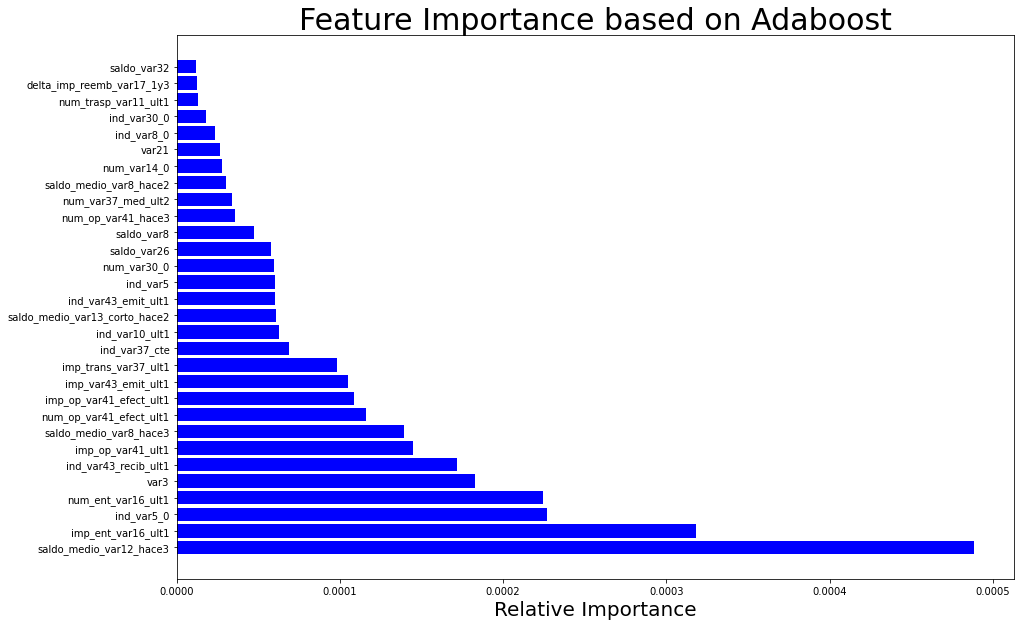

In [ ]:
feature_importances = ada_clf.feature_importances_
feature_imp_ada = {i:j for i,j in zip(X_train.columns, feature_importances)}
feature_imp_ada = {i:j for i,j in zip(feature_imp_ada.keys(), feature_imp_ada.values()) if j!=np.inf}
feature_imp_ada_pd = pd.DataFrame([i for i in feature_imp_ada.items()])
feature_imp_ada_pd.dropna(inplace=True)
feature_imp_ada_pd.sort_values(by = [1], inplace=True, ascending=False)
#print(feature_imp_ada_pd)

plt.figure(figsize=(15,10))
plt.title('Feature Importance based on Adaboost', fontsize=30)
plt.barh(feature_imp_ada_pd.iloc[0:30,0], feature_imp_ada_pd.iloc[0:30,1], color='blue', align='center')
plt.xlabel('Relative Importance', fontsize=20)
plt.show()

##Logistic Regression Based Adaboost Classifier

###1. Fitting training set on the model with optimized parameters and predicting on the test dataset
Getting accuracy score 

In [ ]:
X_train, y_train = X_under.copy(), y_under.copy()

ada_clf2 = AdaBoostClassifier(base_estimator=LogisticRegression(C = c_opt, max_iter= 1000, random_state=42), \
                             n_estimators = best_parameters['n_estimators'], \
                             learning_rate=best_parameters['learning_rate'],\
                             random_state=42)
ada_clf2.fit(X_train, y_train)
pred_ada2 = ada_clf2.predict(X_test)

#created a dataframe and saved the computed metric onto the dataframe
ada_lreg_df = pd.DataFrame(data=[f1_score(y_test, pred_ada2),accuracy_score(y_test, pred_ada2), recall_score(y_test, pred_ada2),
                   precision_score(y_test, pred_ada2), roc_auc_score(y_test, pred_ada2)], 
             columns=['Adaboost(LogReg)'],
             index=['F1 score',"Accuracy", "Recall", "Precision", "ROC AUC Score"])

#concatenating the model and saving the feature in the dataframe
ada_lreg_models = round(pd.concat([ada_lreg_df], axis=1),3)
ada_lreg_models

,Adaboost(LogReg)
F1 score,0.00
Accuracy,0.96
Recall,0.00
Precision,0.00
ROC AUC Score,0.50


###2. Future Importances
Getting top 25 most important features from the data

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:631: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


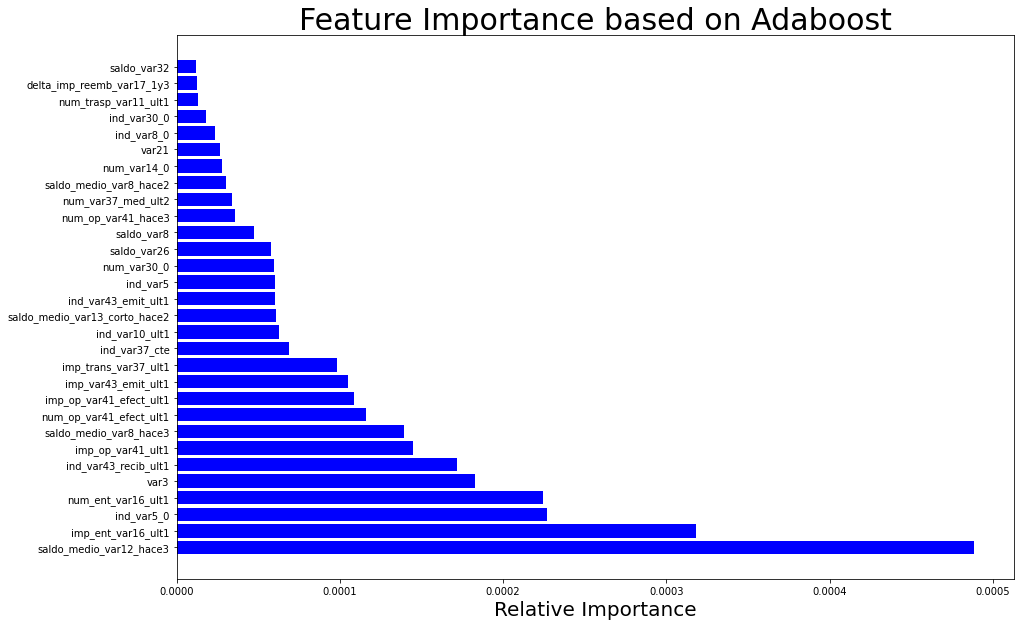

In [ ]:
feature_importances = ada_clf.feature_importances_
feature_imp_ada = {i:j for i,j in zip(X_train.columns, feature_importances)}
feature_imp_ada = {i:j for i,j in zip(feature_imp_ada.keys(), feature_imp_ada.values()) if j!=np.inf}
feature_imp_ada_pd = pd.DataFrame([i for i in feature_imp_ada.items()])
feature_imp_ada_pd.dropna(inplace=True)
feature_imp_ada_pd.sort_values(by = [1], inplace=True, ascending=False)
#print(feature_imp_ada_pd)

plt.figure(figsize=(15,10))
plt.title('Feature Importance based on Adaboost', fontsize=30)
plt.barh(feature_imp_ada_pd.iloc[0:30,0], feature_imp_ada_pd.iloc[0:30,1], color='blue', align='center')
plt.xlabel('Relative Importance', fontsize=20)
plt.show()

# XGBoost Classifier
1. Fitting the data on XGBoost classifier and predicting.
2. Calculating scores.
2. Getting the list of top30 most important features.

## 1. Fitting the data on XGBoost classifier and doing prediction

In [ ]:
# XGBoost method using estimator as Decision Tree Classifier
X_train = X_under.copy()
y_train = y_under.copy()
data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10, random_state=42)
xg_reg.fit(X_train,y_train)
xgb_preds = xg_reg.predict(X_test)


##2. Calculating Scores

In [ ]:
#created a dataframe and saved the computed metric onto the dataframe
xgb_df = pd.DataFrame(data=[f1_score(y_test, xgb_preds),accuracy_score(y_test, xgb_preds), recall_score(y_test, xgb_preds),
                   precision_score(y_test, xgb_preds), roc_auc_score(y_test, xgb_preds)], 
             columns=['XGBoost'],
             index=['F1 score',"Accuracy", "Recall", "Precision", "ROC AUC Score"])

#concatenating the model and saving the feature in the dataframe
df_models = round(pd.concat([xgb_df], axis=1),3)
df_models

,XGBoost
F1 score,0.187
Accuracy,0.799
Recall,0.580
Precision,0.111
ROC AUC Score,0.694


##3. Getting the list of top 30 most important features.

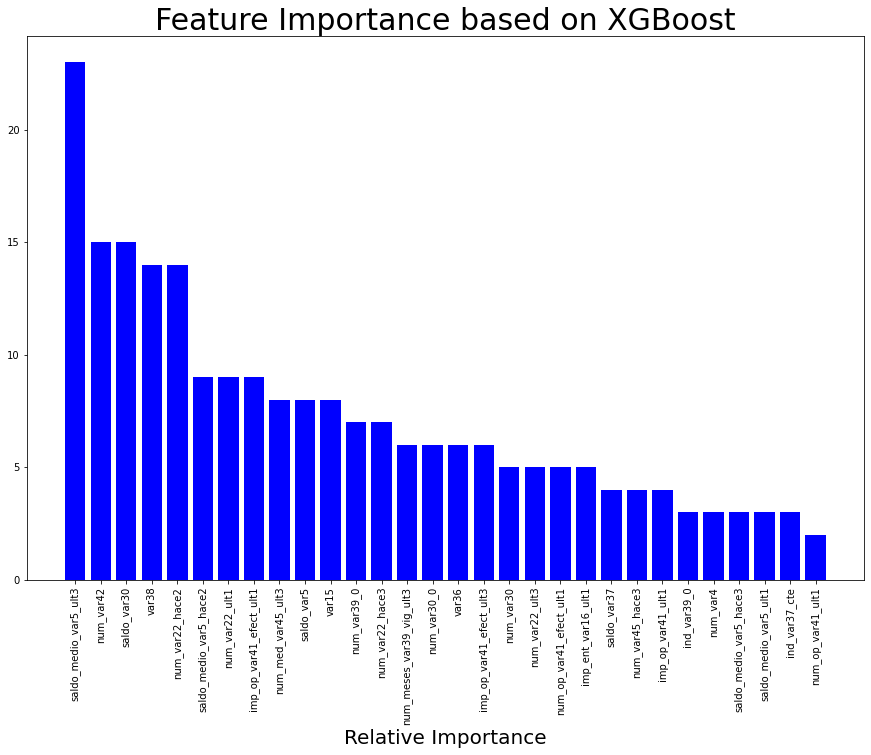

In [ ]:
#Top 30 most important features of XGBoost 

#XGBoost Important Features
features_xgb = xg_reg.get_booster().get_score(importance_type='weight')
features_xgb_sorted = pd.DataFrame(sorted(features_xgb.items(), key=lambda x:x[1], reverse=True))
#print(features_xgb_sorted)

plt.figure(figsize=(15,10))
plt.title('Feature Importance based on XGBoost', fontsize=30)
plt.bar(features_xgb_sorted.iloc[0:30,0], features_xgb_sorted.iloc[:30,1], color='blue', align='center')
#plt.yticks(features_xgb_sorted.iloc[:30,0], [features[i] for i in indices])
plt.ylabel('')
plt.xlabel('Relative Importance', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

#Result, Conclusion and Future Works

##Results

                     F1 score  Accuracy  Recall  Precision  ROC AUC Score
Logistic Regression     0.150     0.716   0.626      0.085          0.673
Decision Tree           0.167     0.819   0.455      0.102          0.645
Random Forest           0.219     0.880   0.422      0.147          0.794
Adaboost(DTree)         0.209     0.854   0.483      0.134          0.769
Adaboost(LogReg)        0.000     0.960   0.000      0.000          0.500
XGBoost                 0.187     0.799   0.580      0.111          0.694


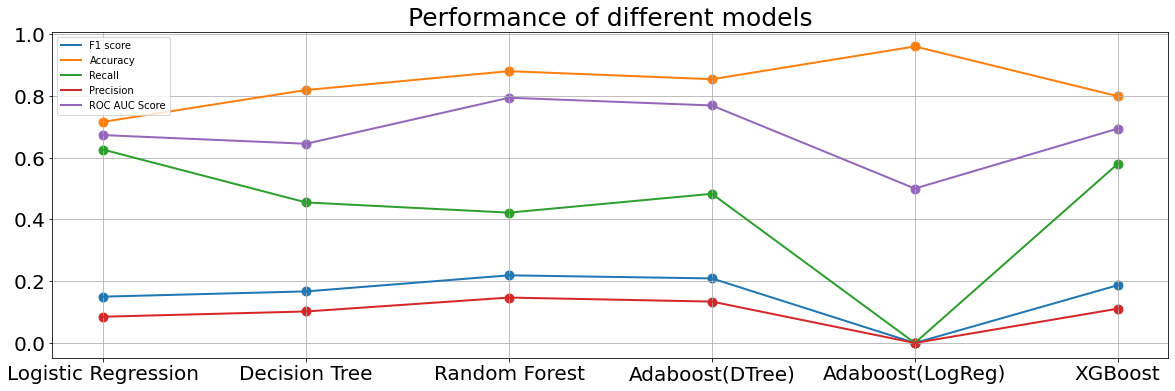

In [ ]:
results_df = round(pd.concat([lreg_df, dtree_df, rforest_df1, ada_df, ada_lreg_df, xgb_df], axis=1),3)
res_t = results_df.T
print(res_t)

plt.figure(figsize=(20,6))
for i in res_t.columns:
  plt.plot(res_t[i], linewidth=2)
  plt.scatter(res_t[i].index, res_t[i], s=80)

plt.xticks(res_t[i].index, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(res_t.columns)
plt.title('Performance of different models', fontsize=25)
plt.grid()
plt.show()  

##Conclusion


*   Data preprocessing was performed on the dataset and out of 369 features, 160 features were finally taken for model building and prediction.
*   Ensemble models are performing better than the base models like Logistic Regression and Decision Tree for obvious reasons. Improvement in performance in ensemble models is considerable for ROC AUC score but not enough for Precision which in this case is the most important score.
*   Accuracy score is high for most of the models but since test set is unbalanced with majority class as 'satisfied', we cannot use this score as our evaluation metric. As an example, Adaboost with Logistic Regression as its base estimator is giving 93% accuracy but it is actually the worst model because its ROC AUC score and precision is 0.
*   Final conclusion would be, if we have an unbalanced dataset, a lot of attention has to be given towards Data Preparation process, because data preparation becomes a pivotal step for the better performance of the models. 





##Necessary Improvements Needed


*   **Data Preparation Strategy:** We need more robust data preparation strategy by developing a deeper understanding of the dataset. Precision scores were consistently low for all of our models, which is a direct result of a poor data preparation. There is no single method for handling imbalance, so we need to iterate through its different methods and select the one which works best for our case. Outlier detection and elimination also might be an important step to get better results.
*   **Handling Features:** Improvement is needed towards better filtering of the columns in terms of variance in them, their contribution towards the response variable, etc. Identifying features is also critical to since it will enable us to categorize them in different sets and then try to understand how a particular set is correlated to target variable, can give us huge insight into the data.  But this step requires in depth literature review, thus can be done as a future work. 



